# Tensorflow-hand-gesture-recognition using Convolutional neural  networks

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')

sns.set(style='whitegrid',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


In [2]:
import os
os.chdir('C:\\Users\\projects\\Desktop\\CNN Model Design of Gesture Recognition\\Code\\leapgestrecog\\00')

In [3]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('C:\\Users\\projects\\Desktop\\CNN Model Design of Gesture Recognition\\Code\\leapgestrecog\\00'):
    if not j.startswith('.'): 
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [4]:
x_data = []
y_data = []
IMG_SIZE = 150
datacount = 0 
for i in range(0, 10): 
    for j in os.listdir('C:\\Users\\projects\\Desktop\\CNN Model Design of Gesture Recognition\\Code\\leapgestrecog\\0' + str(i) + '\\'):
        if not j.startswith('.'):
            count = 0 
            for k in os.listdir('C:\\Users\\projects\\Desktop\\CNN Model Design of Gesture Recognition\\Code\\leapgestrecog\\0' + 
                                str(i) + '\\' + j + '\\'):
                path = 'C:\\Users\\projects\\Desktop\\CNN Model Design of Gesture Recognition\\Code\\leapgestrecog\\0' + str(i) + '\\' + j + '\\' + k
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

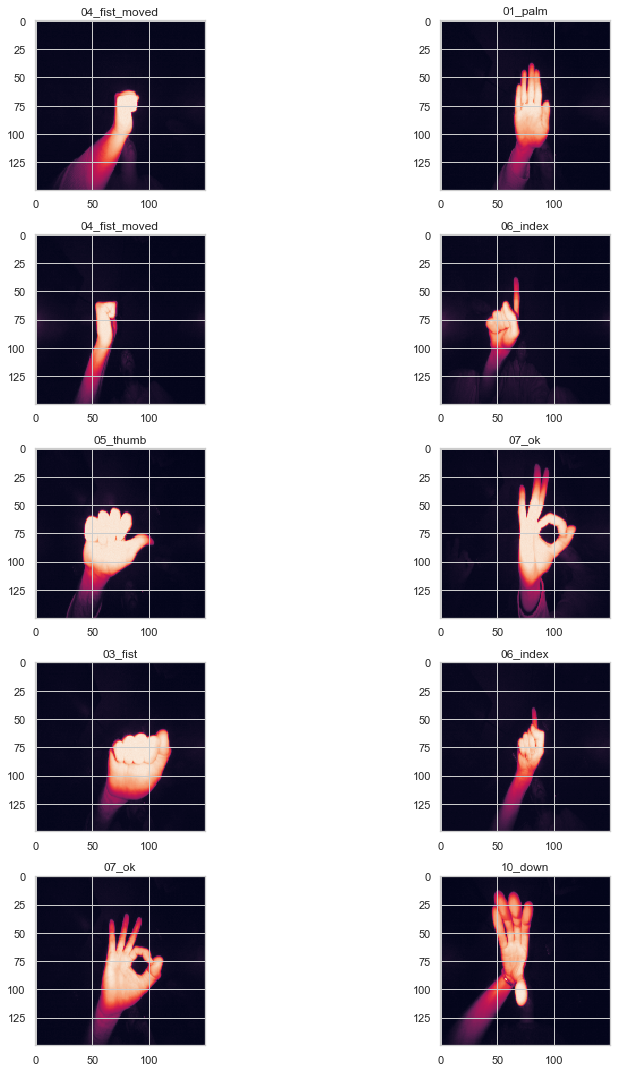

In [5]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title(reverselookup[y_data[l,0]])
        
plt.tight_layout()

In [6]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=42)

# Creating the Sequential model using tensorflow(backend keras)

In [8]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [9]:
batch_size=128
epochs=1

In [10]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

# Train

In [12]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, y_test))

Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - ETA: 5:50 - loss: 2.3031 - accuracy: 0.05 - ETA: 5:13 - loss: 2.2965 - accuracy: 0.10 - ETA: 4:56 - loss: 2.2892 - accuracy: 0.12 - ETA: 4:44 - loss: 2.2786 - accuracy: 0.14 - ETA: 4:35 - loss: 2.2569 - accuracy: 0.17 - ETA: 4:30 - loss: 2.2197 - accuracy: 0.19 - ETA: 4:26 - loss: 2.1753 - accuracy: 0.21 - ETA: 4:22 - loss: 2.1301 - accuracy: 0.23 - ETA: 4:18 - loss: 2.0542 - accuracy: 0.26 - ETA: 4:14 - loss: 2.0170 - accuracy: 0.27 - ETA: 4:10 - loss: 1.9546 - accuracy: 0.29 - ETA: 4:07 - loss: 1.9330 - accuracy: 0.30 - ETA: 4:04 - loss: 1.8762 - accuracy: 0.32 - ETA: 4:01 - loss: 1.8336 - accuracy: 0.33 - ETA: 3:59 - loss: 1.7967 - accuracy: 0.35 - ETA: 3:57 - loss: 1.7532 - accuracy: 0.37 - ETA: 3:55 - loss: 1.7161 - accuracy: 0.39 - ETA: 3:52 - loss: 1.6868 - accuracy: 0.40 - ETA: 3:50 - loss: 1.6574 - accuracy: 0.41 - ETA: 3:47 - loss: 1.6223 - accuracy: 0.42 - ETA: 3:44 - lo

# Check Result

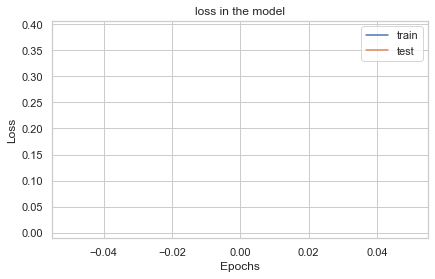

In [16]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('loss in the model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

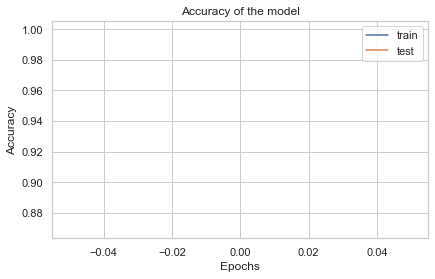

In [17]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [3]:
path='C:\\Users\\projects\\Desktop\\CNN Model Design of Gesture Recognition\\Code\\f3.png'
img = cv2.imread(path,0)
plt.imshow(img)


In [26]:
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

img=img.reshape(150,150,1)
img.reshape([-1,150, 150,1])
img = np.expand_dims(img, axis = 0)
img


array([[[[ 6],
         [ 5],
         [ 5],
         ...,
         [ 4],
         [ 4],
         [ 4]],

        [[ 5],
         [ 6],
         [ 6],
         ...,
         [ 3],
         [ 4],
         [ 4]],

        [[ 6],
         [ 6],
         [ 5],
         ...,
         [ 3],
         [ 4],
         [ 4]],

        ...,

        [[ 7],
         [ 8],
         [ 9],
         ...,
         [ 4],
         [ 5],
         [ 4]],

        [[ 7],
         [10],
         [ 9],
         ...,
         [ 4],
         [ 5],
         [ 4]],

        [[ 8],
         [ 8],
         [ 8],
         ...,
         [ 4],
         [12],
         [15]]]], dtype=uint8)

In [ ]:
img.shape

In [ ]:
result = model.predict(img)

In [ ]:
result

In [ ]:
if (result[0][0] == 1.0):
    print("Stop")
   
elif (result[0][1] == 1.0):
    print("One")
    
elif (result[0][2] == 1.0):
    print("Fist")
    
elif (result[0][3] == 1.0):
    print("Go")
    
elif (result[0][4] == 1.0):
    print("Forget")
   
elif (result[0][5] == 1.0):
    print("Real")
    
elif (result[0][6] == 1.0):
    print("Nice")
   
elif (result[0][7] == 1.0):
    print("Don't Know")
   
elif (result[0][8] == 1.0):
    print("C")
    
elif(result[0][9] == 1.0):
    print("Sit")